In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import NMF 
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_scatter_NNMF, plot_NNMFs, plot_3Dscatter_NNMF

In [3]:
N_SITE = 100
PATIENT_ID = 4
RADIUS = 100
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
METHOD = 'abs'
PCA_SCALED = False 

cell_ab = CellAbundance(PATIENT_ID, N_SITE, RADIUS, CELL_TYPES, method=METHOD)

In [5]:
model = NMF(max_iter = 10000)
nnmf_feat = model.fit_transform(cell_ab.abundance_matrix) 

In [6]:
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

In [7]:
absolute_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs')

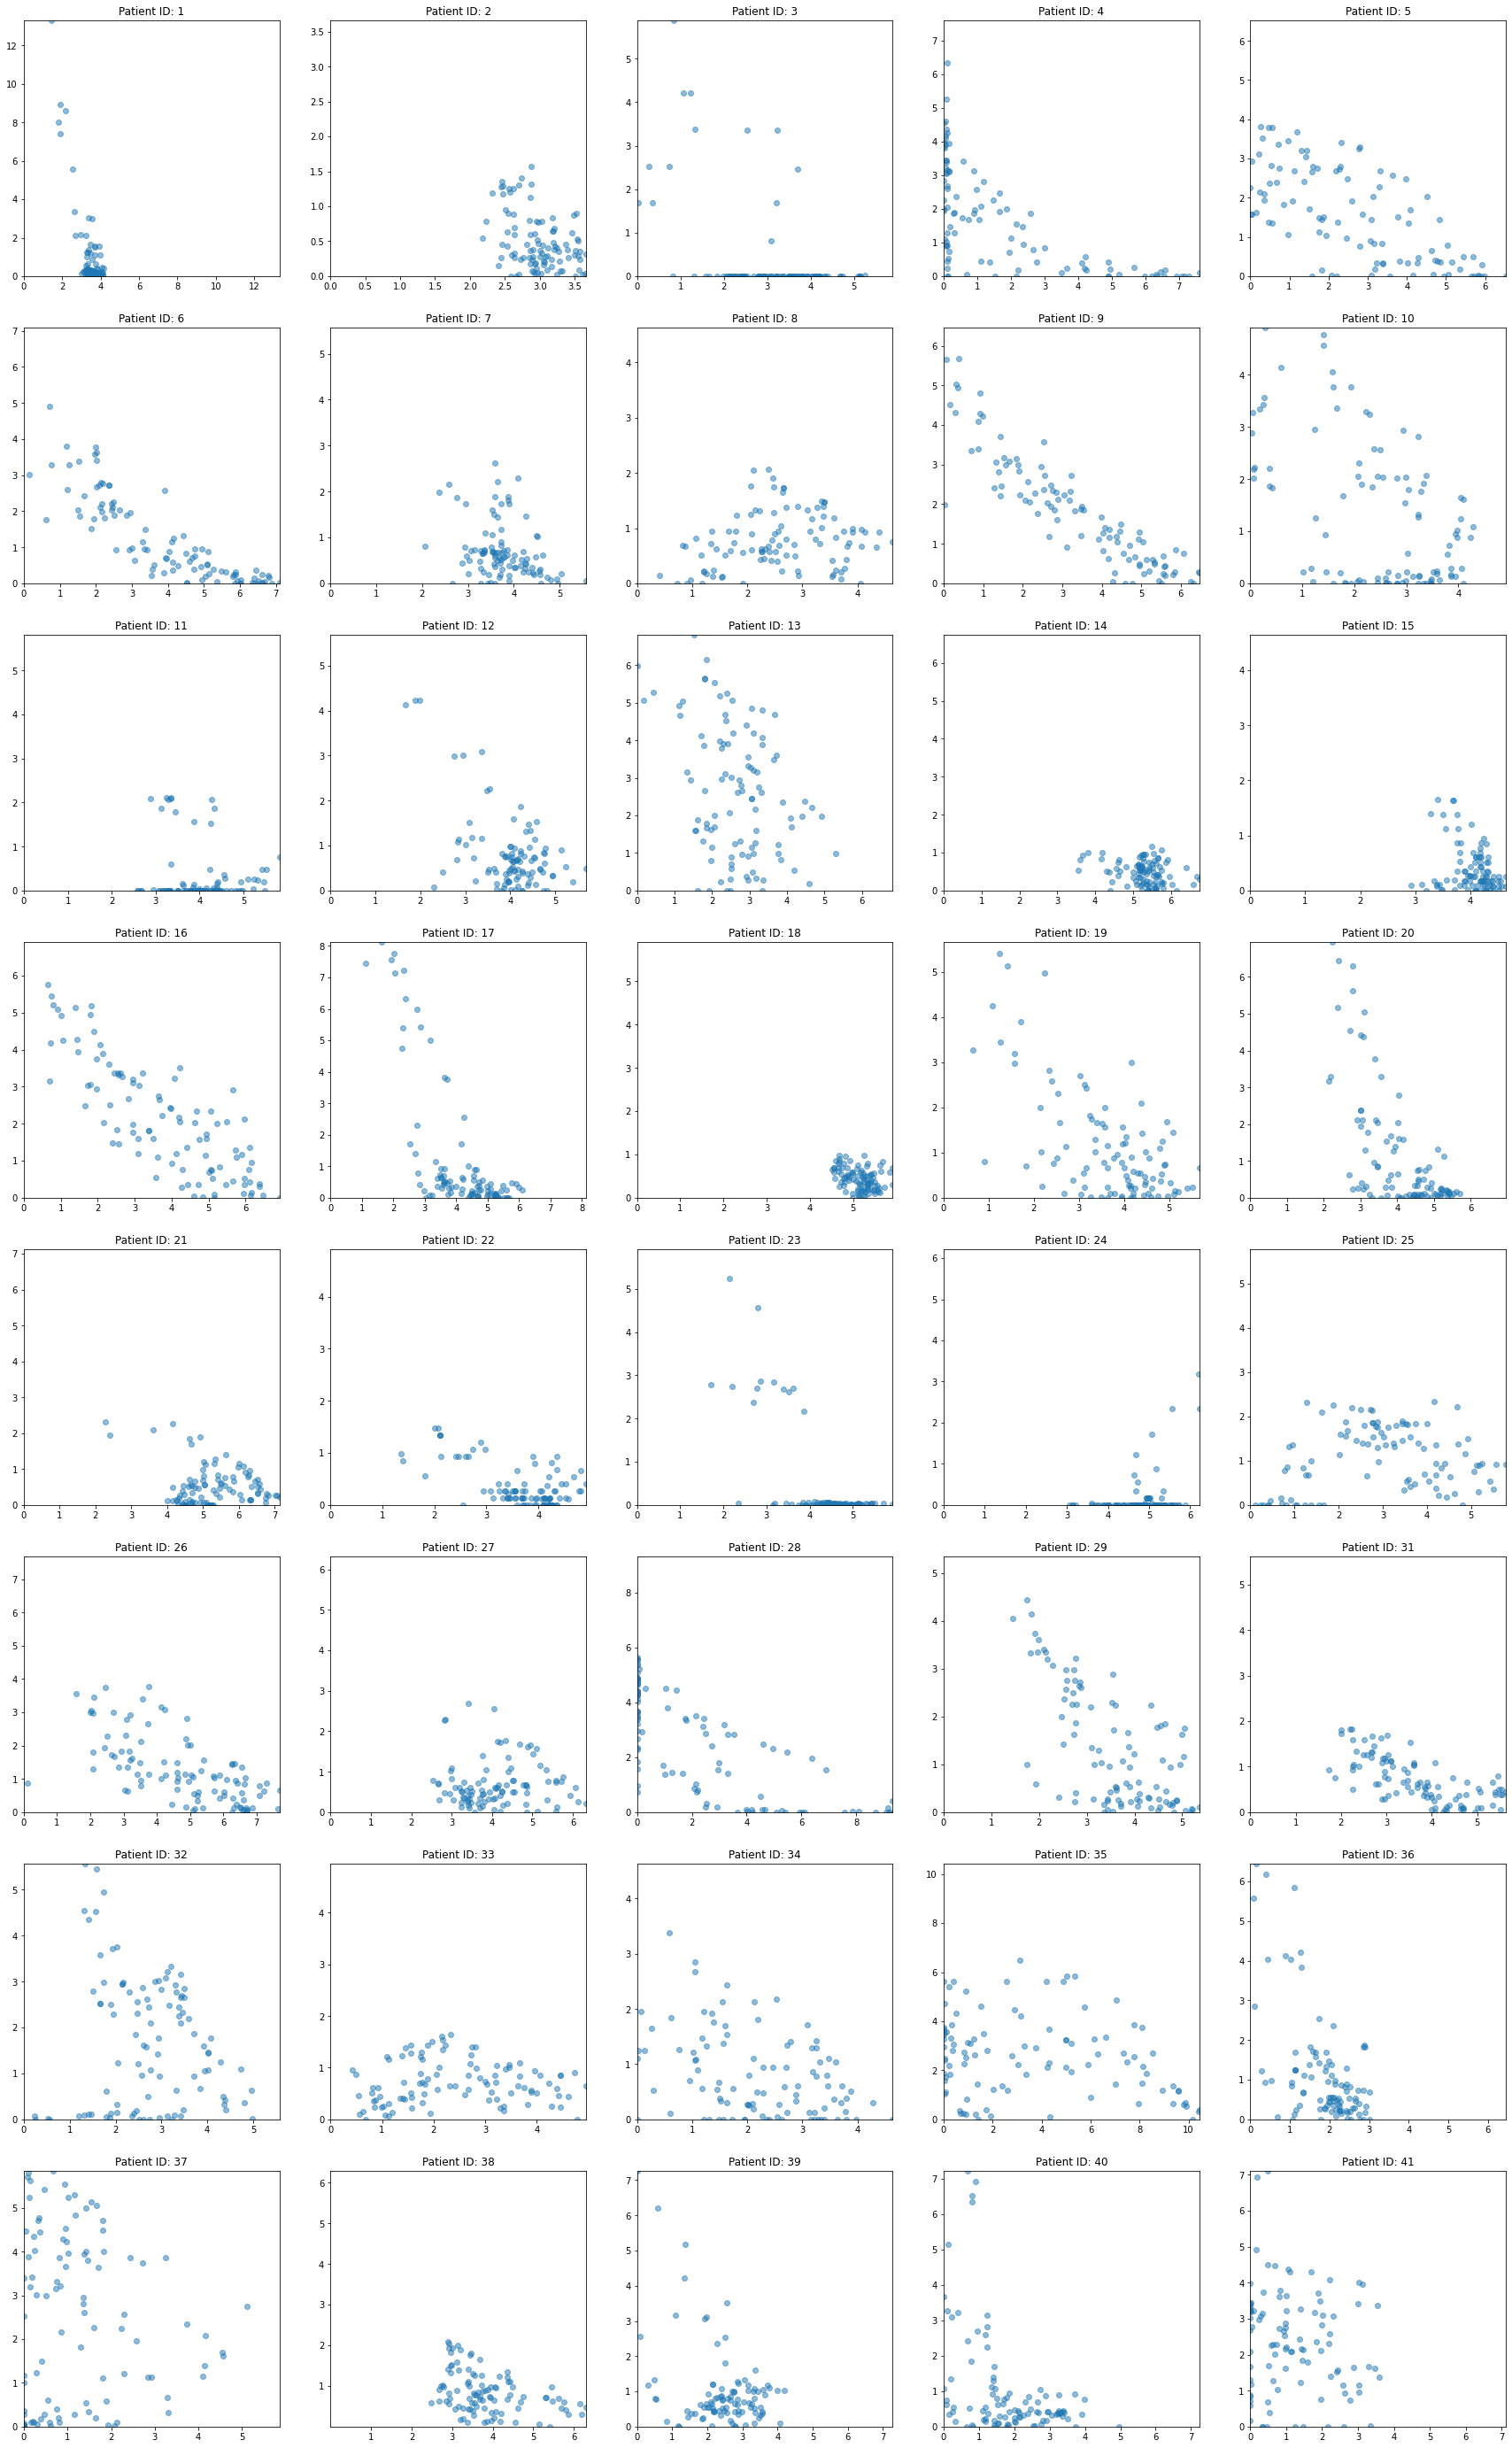

In [8]:
model = NMF(max_iter = 20000)
plot_NNMFs(absolute_ca_list, model)

In [9]:
absolute_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs_log')

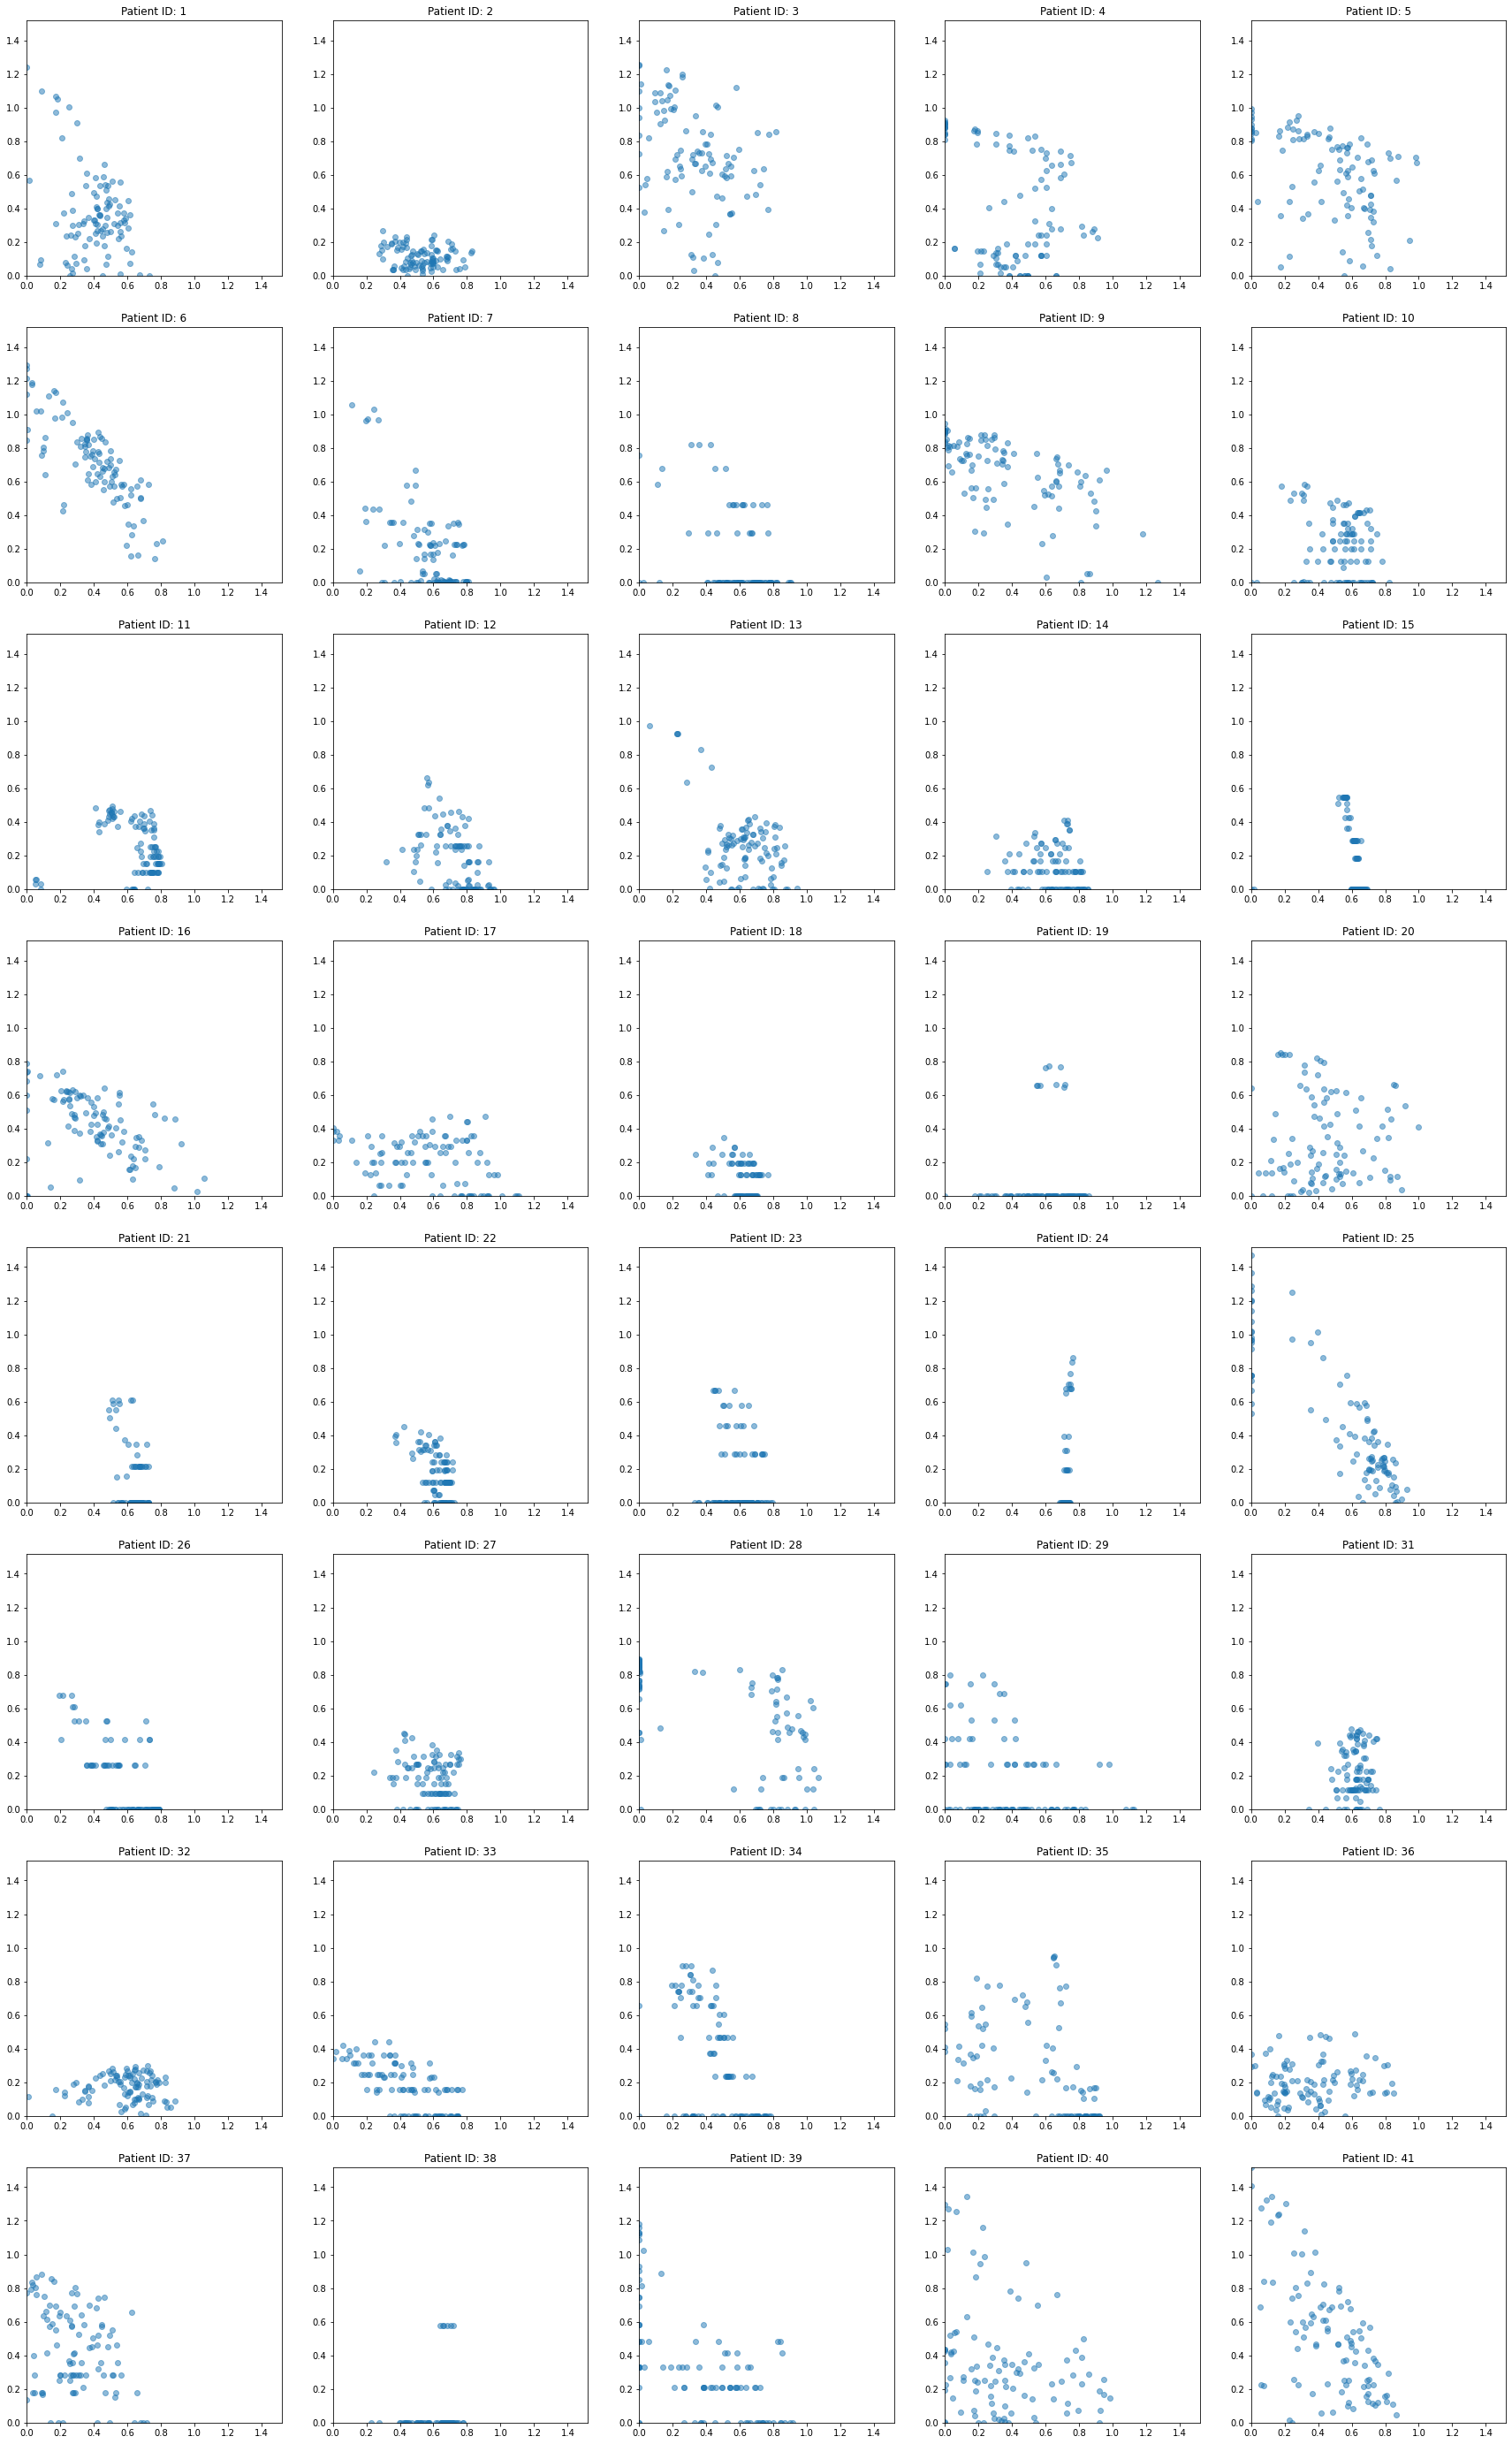

In [10]:
model = NMF(max_iter = 20000)
plot_NNMFs(absolute_ca_list, model, fix_axis=True)

In [9]:
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
full_patient_ids =[37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, full_patient_ids = join_abundance_matrices(abs_log_ca_list)

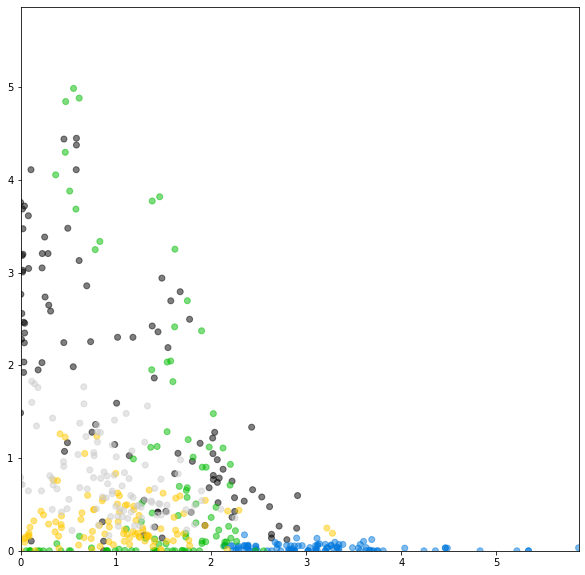

In [10]:
model = NMF(max_iter = 20000)
features = model.fit_transform(sites)
plot_scatter_NNMF(features, full_patient_ids)

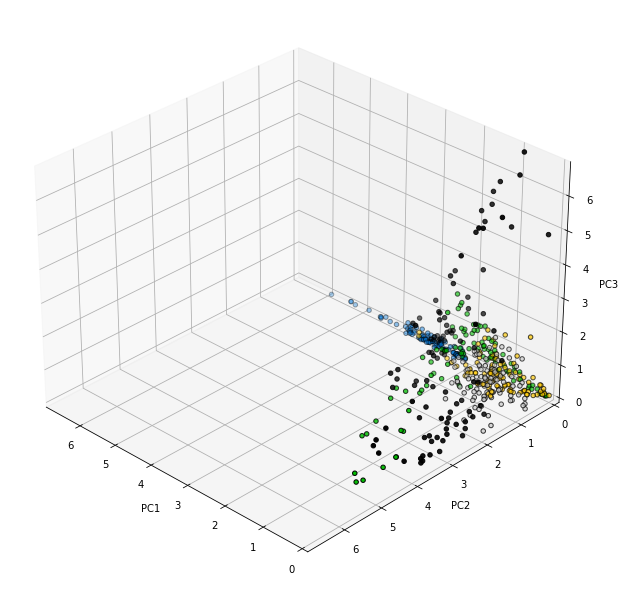

In [11]:
plot_3Dscatter_NNMF(features, full_patient_ids)